<a href="https://colab.research.google.com/github/shreyash22rx/bike_sharing_analysis/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Pre-processing

In [ ]:
# importing basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing data

df = pd.read_csv('/content/bike_share_data.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Exploring columns**

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
df['holiday'].unique()

array([0, 1])

In [ ]:
df['workingday'].unique()

array([0, 1])

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4])

In [ ]:
# extracting month and year column and total riders column

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.strftime('%B')
df['year'] = df['datetime'].dt.year
df['month_num'] = df['datetime'].dt.month
df['day number'] = df['datetime'].dt.dayofweek
df['day of week'] = df['datetime'].dt.strftime('%A')
df['total riders'] = df['casual'] + df['registered']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1


In [ ]:
# map the season dictionary to the season numerical column

season_mapping = {1: 'Winter',
                  2: 'spring',
                  3: 'summer',
                  4: 'fall'}

df['season'] = df['season'].map(season_mapping)

In [ ]:
df['season'].value_counts()

fall      2734
spring    2733
summer    2733
Winter    2686
Name: season, dtype: int64

what % of riders are registered

In [ ]:
(df['registered'].sum()/df['total riders'].sum()) * 100

81.1968586548107

This shows that around 81% of riders are registered

does registered rider % increase by month over time?

In [ ]:
df.groupby(['season','month'])['registered'].sum()/df.groupby('month')['total riders'].sum()

season  month    
Winter  February     0.906198
        January      0.909218
        March        0.812316
fall    December     0.908217
        November     0.856308
        October      0.816390
spring  April        0.762171
        June         0.779942
        May          0.793727
summer  August       0.785168
        July         0.762614
        September    0.784025
dtype: float64

What is % of riders by month?

In [ ]:
df.groupby('month').sum()['total riders']/df['total riders'].sum() * 100

month
April         8.027040
August       10.238238
December      7.679781
February      4.752536
January       3.830492
July         10.291032
June         10.584298
March         6.401464
May           9.597185
November      8.460419
October       9.946602
September    10.190911
Name: total riders, dtype: float64

What is % of casula riders by month?

In [ ]:
df.groupby('month').sum()['casual']/df['casual'].sum() * 100

month
April        10.152881
August       11.697502
December      3.748709
February      2.370867
January       1.849363
July         12.992209
June         12.387061
March         6.389636
May          10.528262
November      6.465375
October       9.712726
September    11.705408
Name: casual, dtype: float64

What is % of riders by season

In [ ]:
(df.groupby(['season']).sum()[['total riders']]/df['total riders'].sum())* 100

,total riders
season,
Winter,14.984493
fall,26.086802
spring,28.208524
summer,30.720181


% of registered riders on working days

In [ ]:
(df.groupby('workingday').sum()['registered']/df['registered'].sum()) * 100

workingday
0    26.505884
1    73.494116
Name: registered, dtype: float64

In [ ]:
# create a mean month and isolate a single year

df = df[df['year']==2011]
df['mean_month'] = df['month'].map(df.groupby('month')['total riders'].median())

In [ ]:
# mean of total riders by month

df.groupby('month')['total riders'].mean()

month
April        111.026374
August       182.666667
December     134.173246
February      73.641256
January       54.645012
July         203.614035
June         196.877193
March         86.849776
May          174.809211
November     155.458333
October      174.773626
September    174.622517
Name: total riders, dtype: float64

In [ ]:
# creating a month dictionary for the visual below

month_dict = []
for i in enumerate(df['month'].unique(),1):
  month_dict.append(i)
month_dict = dict(month_dict)

# Analysing and Visualizing

Text(0.5, 0.98, 'Temp Distribution and Rider Aggregation')

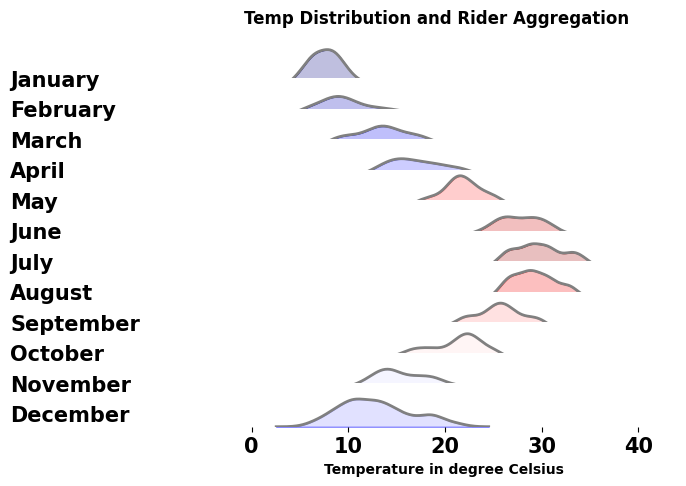

In [ ]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='seismic', n_colors=12,)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row='month', aspect=15,height=0.4, hue='mean_month',palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'temp',fill=True, lw=1)
# adding a liner graph for the outline
g.map(sns.kdeplot, 'temp',lw=2,color='grey')


#We use the facet grid axes(g.axes.flat) and add the month as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-25, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15)

#Lets adjust the plots so they overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set_xlabels("")
g.set_ylabels("")
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Temp Distribution and Rider Aggregation',fontweight='bold')

Evaluate correlation

In [ ]:
correlations = []
def correlation_matrix(data,col1,col2,col3,col4):
    correlation1_sp =spearmanr(data[col1],data[col2])[0]
    correlation2_sp = spearmanr(data[col3],data[col4])[0]
    correlation3_sp = pearsonr(data[col1],data[col2])[0]
    correlation4_sp = pearsonr(data[col3],data[col4])[0]
    series = pd.Series({'registered (spearman)':correlation1_sp,
                        'casual (spearman)':correlation2_sp,
                        'registered (pearsonr)':correlation3_sp,
                        'casual (pearsonr)':correlation4_sp})
    return series
correlation_matrix(df,'registered','temp','casual','temp')

registered (spearman)    0.392768
casual (spearman)        0.608138
registered (pearsonr)    0.370767
casual (pearsonr)        0.498356
dtype: float64

<Axes: >

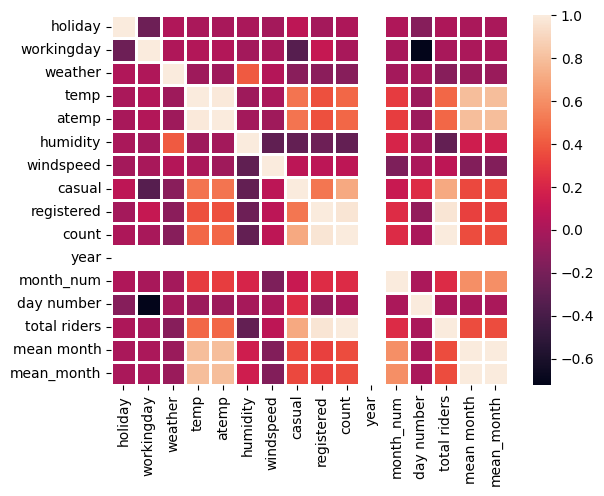

In [ ]:
# create a correlation plot
sns.heatmap(df.corr(),linewidths=1)

Text(0.5, 1.0, 'Overall Correlation')

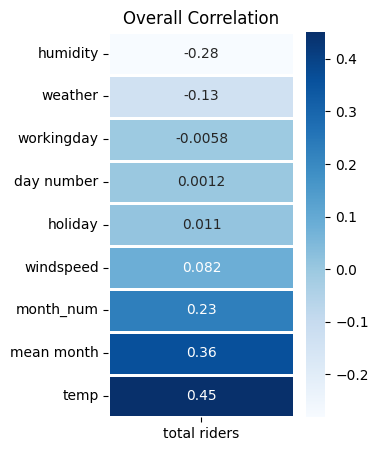

In [ ]:
#lets isolate the correlation to only the riders
plt.figure(figsize=(3,5))
sns.heatmap(df.corr()[['total riders']].sort_values(by='total riders')\
            .drop(['total riders',
                   'count',
                   'mean_month',
                   'atemp',
                   'registered','casual','year']),linewidths=1,annot=True, cmap='Blues')
plt.title('Overall Correlation')

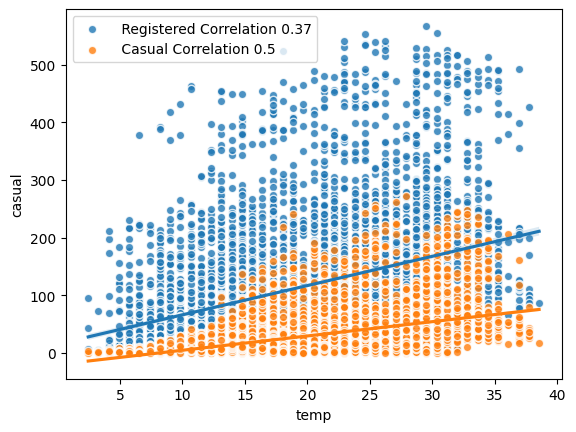

In [ ]:
#lets create a scatter plot with both rider types and the correlation
r_corr =round(pearsonr(df['temp'],df['registered'])[0],2)
c_corr = round(pearsonr(df['temp'],df['casual'])[0],2)
sns.regplot(data=df,x='temp',y='registered',scatter_kws={'edgecolor':'white'},label=f' Registered Correlation {r_corr}')
sns.regplot(data=df,x='temp',y='casual',scatter_kws={'edgecolor':'white'},label=f' Casual Correlation {c_corr}')
plt.legend()

Text(0.5, 1.0, 'Registered')

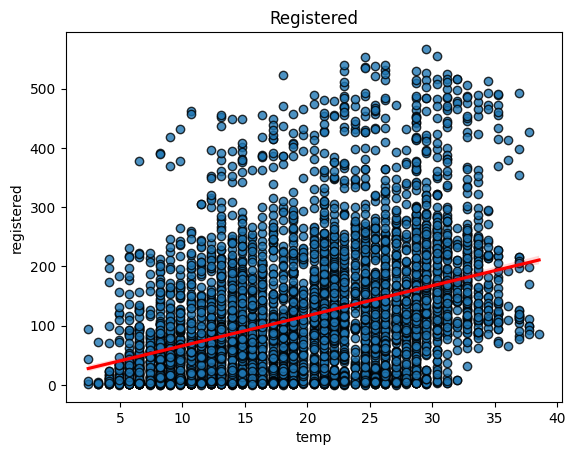

In [ ]:
sns.regplot(data=df,x='temp',y='registered',scatter_kws={'edgecolor':'black'},
            label=f' Registered Correlation {r_corr}',
           line_kws={'color':'red'})
plt.title('Registered')

Text(0.5, 1.0, 'Casual')

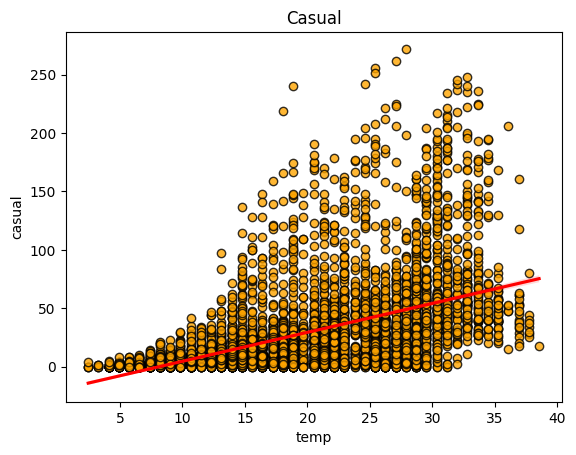

In [ ]:
sns.regplot(data=df,x='temp',y='casual',scatter_kws={'edgecolor':'black'},
            label=f' Casual Correlation {c_corr}',
            color='orange',
            line_kws={'color':'red'})
plt.title('Casual')

In [ ]:
df['hour'] =df['datetime'].dt.hour

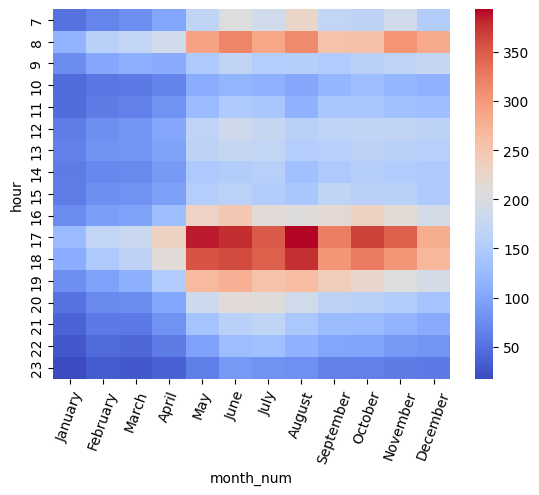

In [ ]:
#lets create a heatmap  of the hour and months to see how riders are affected.
ax =sns.heatmap(pd.pivot_table(data=df[df['hour']>6],
                           index='hour',
                           columns='month_num',
                           values='registered',
                           aggfunc='mean'),cmap='coolwarm')
ax.set_xticklabels(df.month.unique())
plt.xticks(rotation=70);

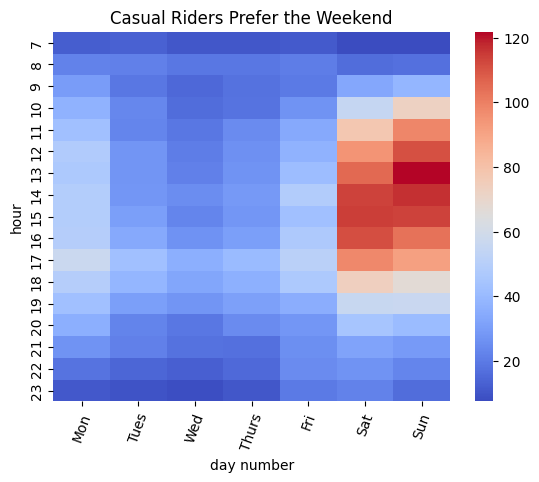

In [ ]:
#lets create a heatmap  of the hour and day of week to see how riders are affected.
ax = sns.heatmap(pd.pivot_table(data=df[df['hour']>6],
                           index='hour',
                           columns='day number',
                           values='casual',aggfunc='mean'),
                           cmap='coolwarm')
ax.set_xticklabels(['Mon', 'Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.xticks(rotation=70)
plt.title('Casual Riders Prefer the Weekend');

In [ ]:
df.groupby('day of week').sum()['casual']/df['casual'].sum()

day of week
Friday       0.122881
Monday       0.135056
Saturday     0.246257
Sunday       0.242040
Thursday     0.086120
Tuesday      0.093289
Wednesday    0.074356
Name: casual, dtype: float64

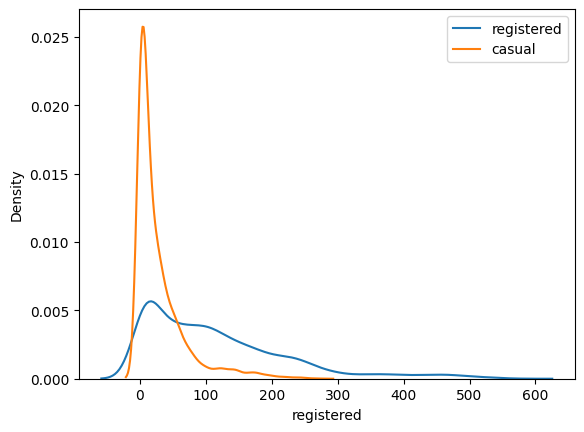

In [ ]:
sns.kdeplot(df['registered'],label='registered')
sns.kdeplot(df['casual'],label='casual')
plt.legend()

In [ ]:
df['Temp Buckets'] =  pd.qcut(df['temp'],4)

In [ ]:
df['Temp Buckets'].value_counts()

(19.68, 26.24]    1412
(2.459, 13.12]    1395
(13.12, 19.68]    1344
(26.24, 38.54]    1271
Name: Temp Buckets, dtype: int64

In [ ]:
grouping = df.groupby('Temp Buckets').mean()[['casual','registered','total riders']]
grouping['Difference'] =  grouping['registered']/grouping['casual']
grouping

,casual,registered,total riders,Difference
Temp Buckets,,,,
"(2.459, 13.12]",5.572043,66.151254,71.723297,11.871993
"(13.12, 19.68]",20.004464,98.537946,118.542411,4.925798
"(19.68, 26.24]",32.763456,130.558074,163.321530,3.984869
"(26.24, 38.54]",58.926829,170.808812,229.735641,2.898659


<Axes: title={'center': 'Exponential Change in Riders By Temp Group'}, xlabel='Temp Buckets', ylabel='Difference'>

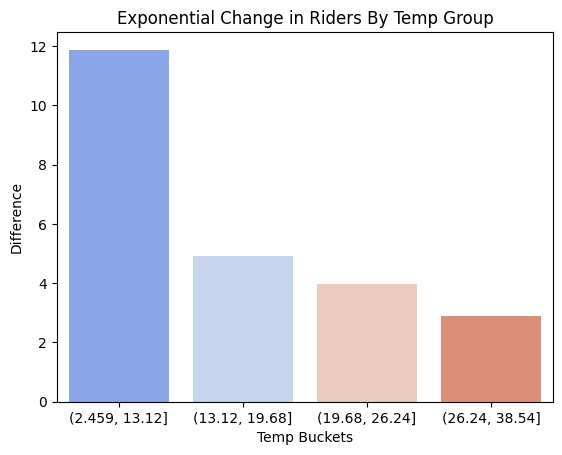

In [ ]:
plt.title('Exponential Change in Riders By Temp Group')
sns.barplot(data = grouping, x=grouping.index, y='Difference',palette='coolwarm')